In [34]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [35]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Import required libaries for Ridge, Lasso and GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [37]:
# Setting option to display all the columns and rows in dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [38]:
#loading the dataset
df=pd.read_csv('Surprise housing case study.csv')

In [39]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [41]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [42]:
df.isnull().any().sum()

19

In [43]:
null_columns=df.columns[df.isnull().any()]
null_columns

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [44]:
null_columns.shape

(19,)

In [45]:
null_count=df[null_columns].isnull().sum().sort_values(ascending=False)
null_per=(df[null_columns].isnull().sum()*100/df.shape[0]).sort_values(ascending=False)

In [46]:
null_data=pd.concat([null_count,null_per],axis=1,keys=['Count', 'Percentage'])

In [47]:
null_data

,Count,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [48]:
df.drop(columns=null_data[ null_data['Percentage'] > 15].index, inplace=True)

In [49]:
df.shape

(1460, 74)

In [50]:
null_data = null_data[null_data['Percentage'] < 15]
null_data

,Count,Percentage
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945
GarageCond,81,5.547945
BsmtFinType2,38,2.602740
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtCond,37,2.534247
BsmtQual,37,2.534247


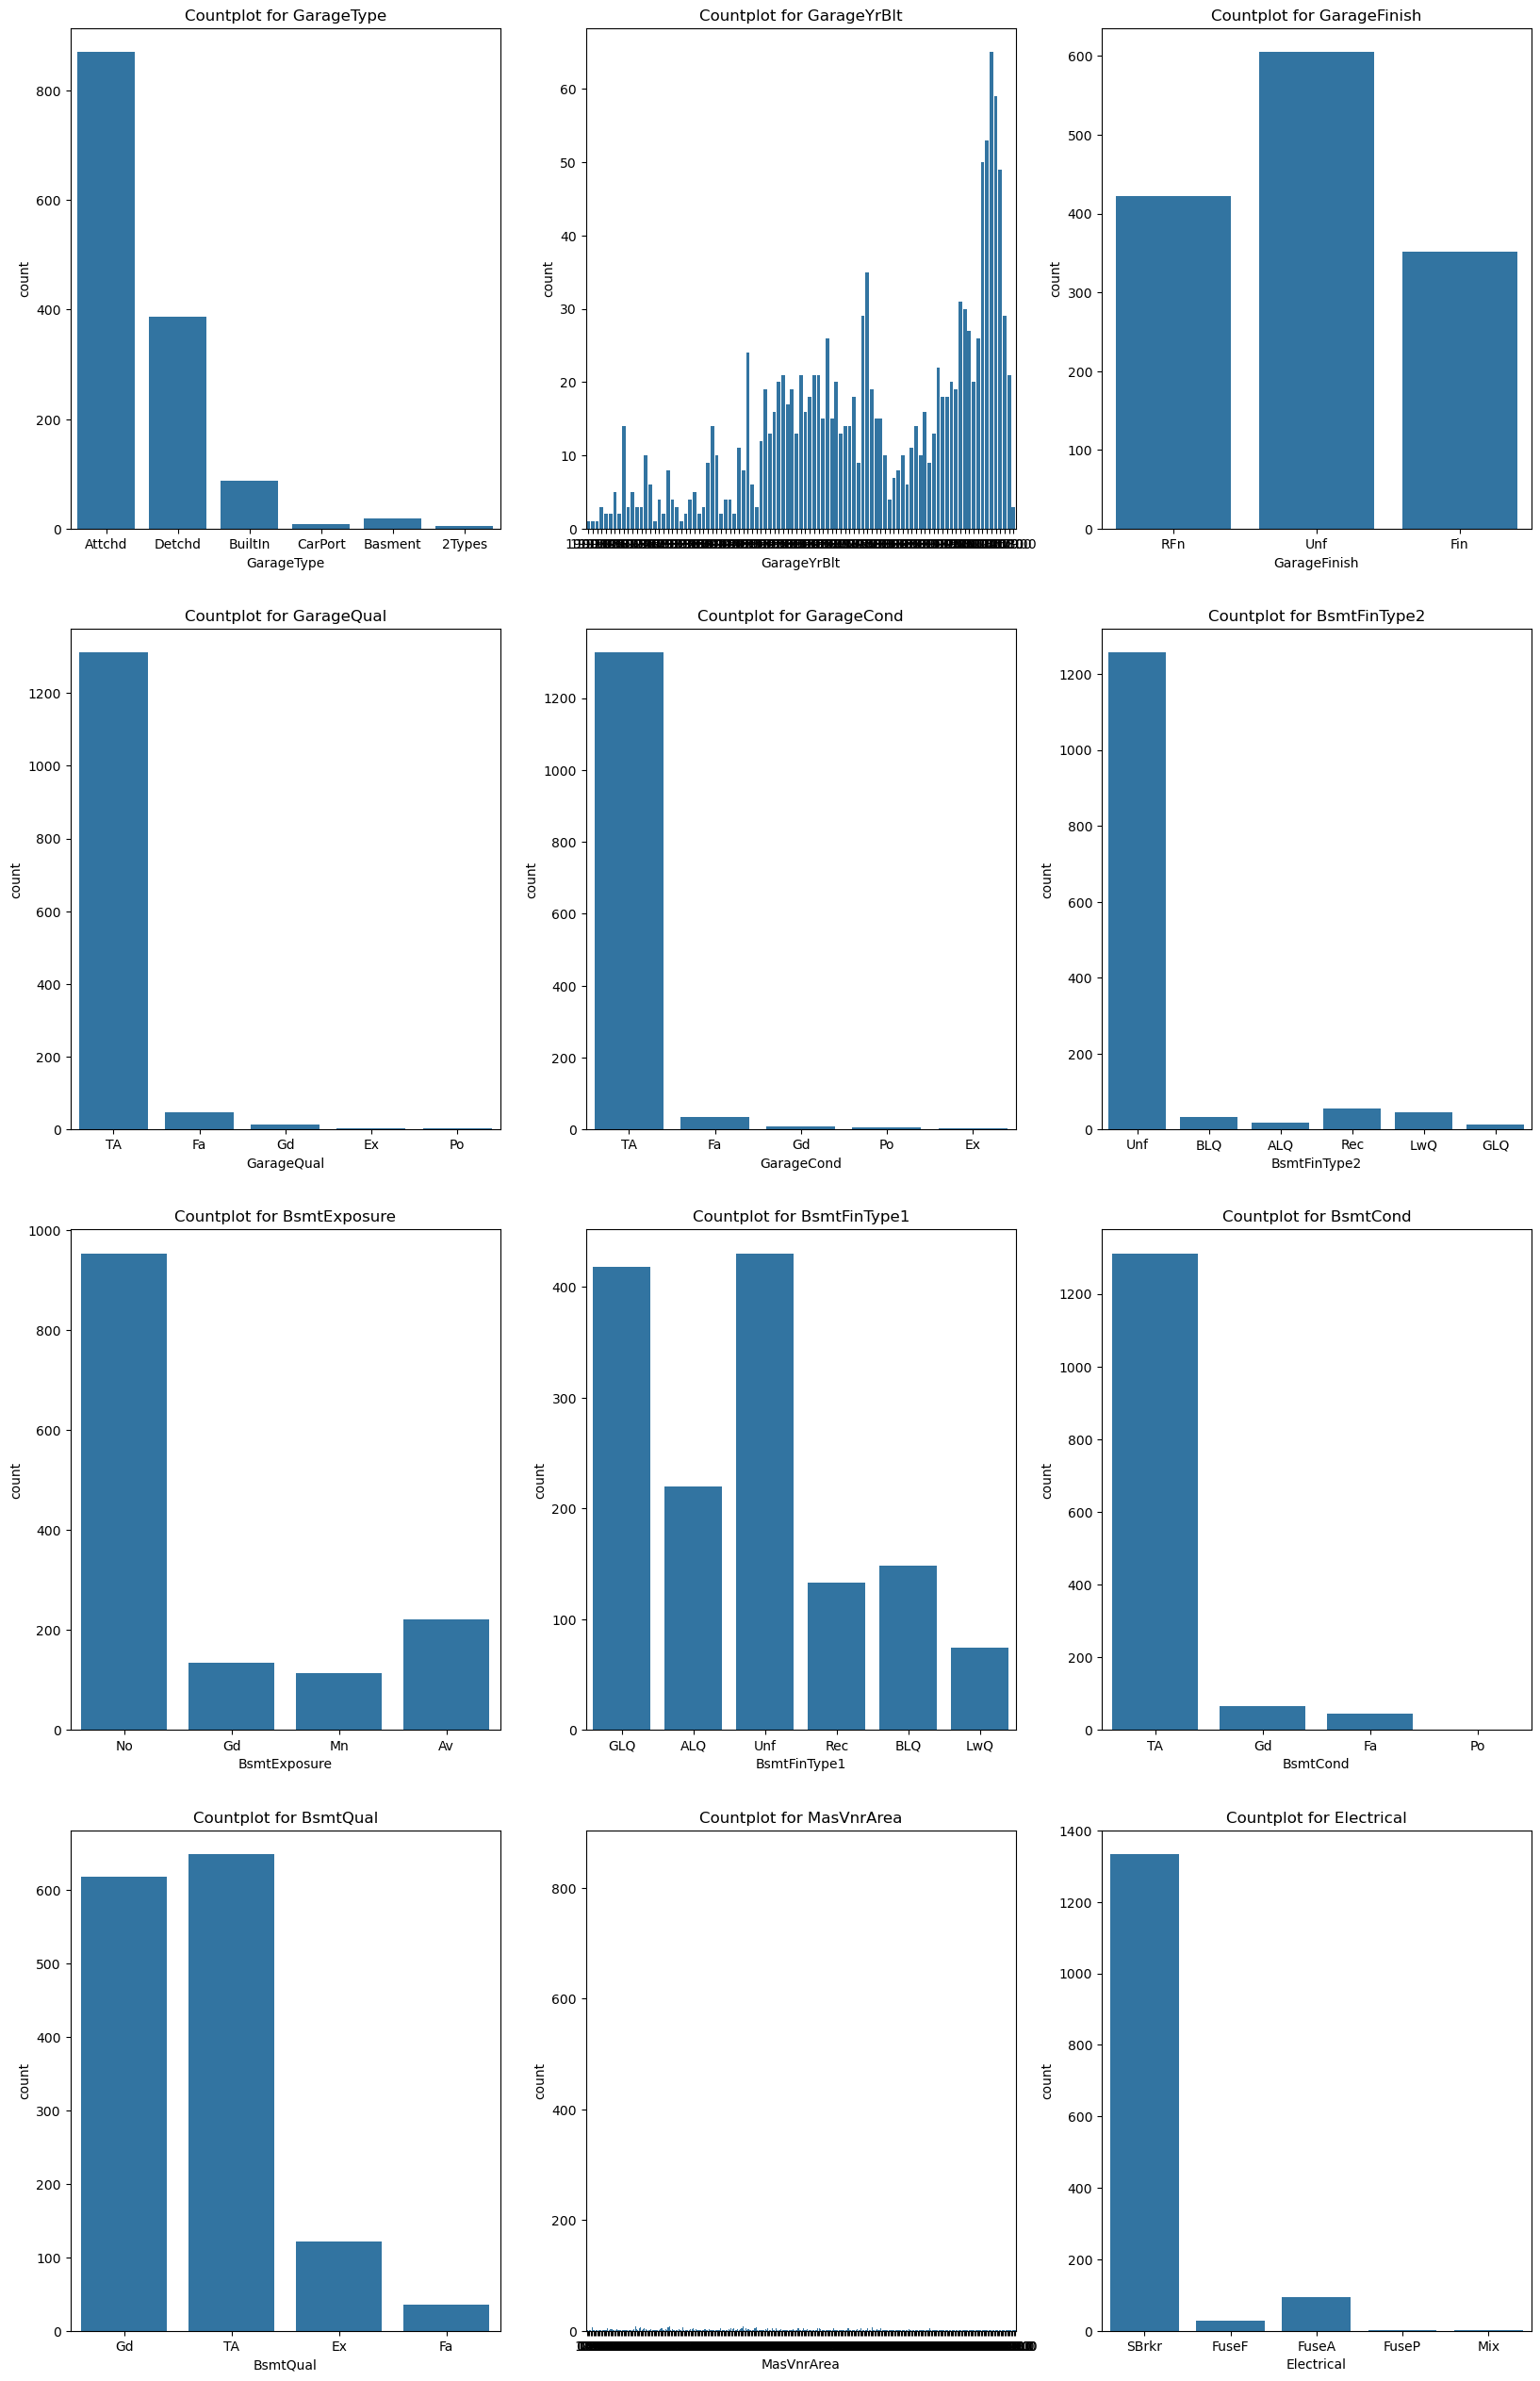

In [51]:
%matplotlib inline
plt.rcParams['figure.figsize']=20,40
for i,var in enumerate(null_data.index,start=1):
    plt.subplot(5,3,i)
    sns.countplot(x=var,data=df)
    plt.title(f"Countplot for {var}")

We will use the following method to conduct imputation for these columns:
- If the column is `categorical`, the missing values will be replaced using `mode()`.
- If the column contains `numerical values`, the missing values will be replaced using `median()`.
- If the value `NA` in the column has a meaningful value (GarageType = NA, for example, denotes "No Garage"). These settings will be changed to `None`.


In [53]:
#meaningfull categorical columns
meaning_col=['GarageType','GarageFinish','GarageQual','GarageCond','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']
for feature in meaning_col:
    df[feature].fillna('None',inplace=True)

In [54]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)

In [55]:
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)

In [56]:
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

In [57]:
df.isnull().any().sum()

0

# Dropping unimportant columnsThe columns will be removed in accordance with:
1) The model has less room to learn if the variance in the column is really low. These columns are going away.
2) A few columns, such `Id`, are meaningless because they don't offer any insightful information. We'll get rid of these too

In [59]:
df.shape

(1460, 74)

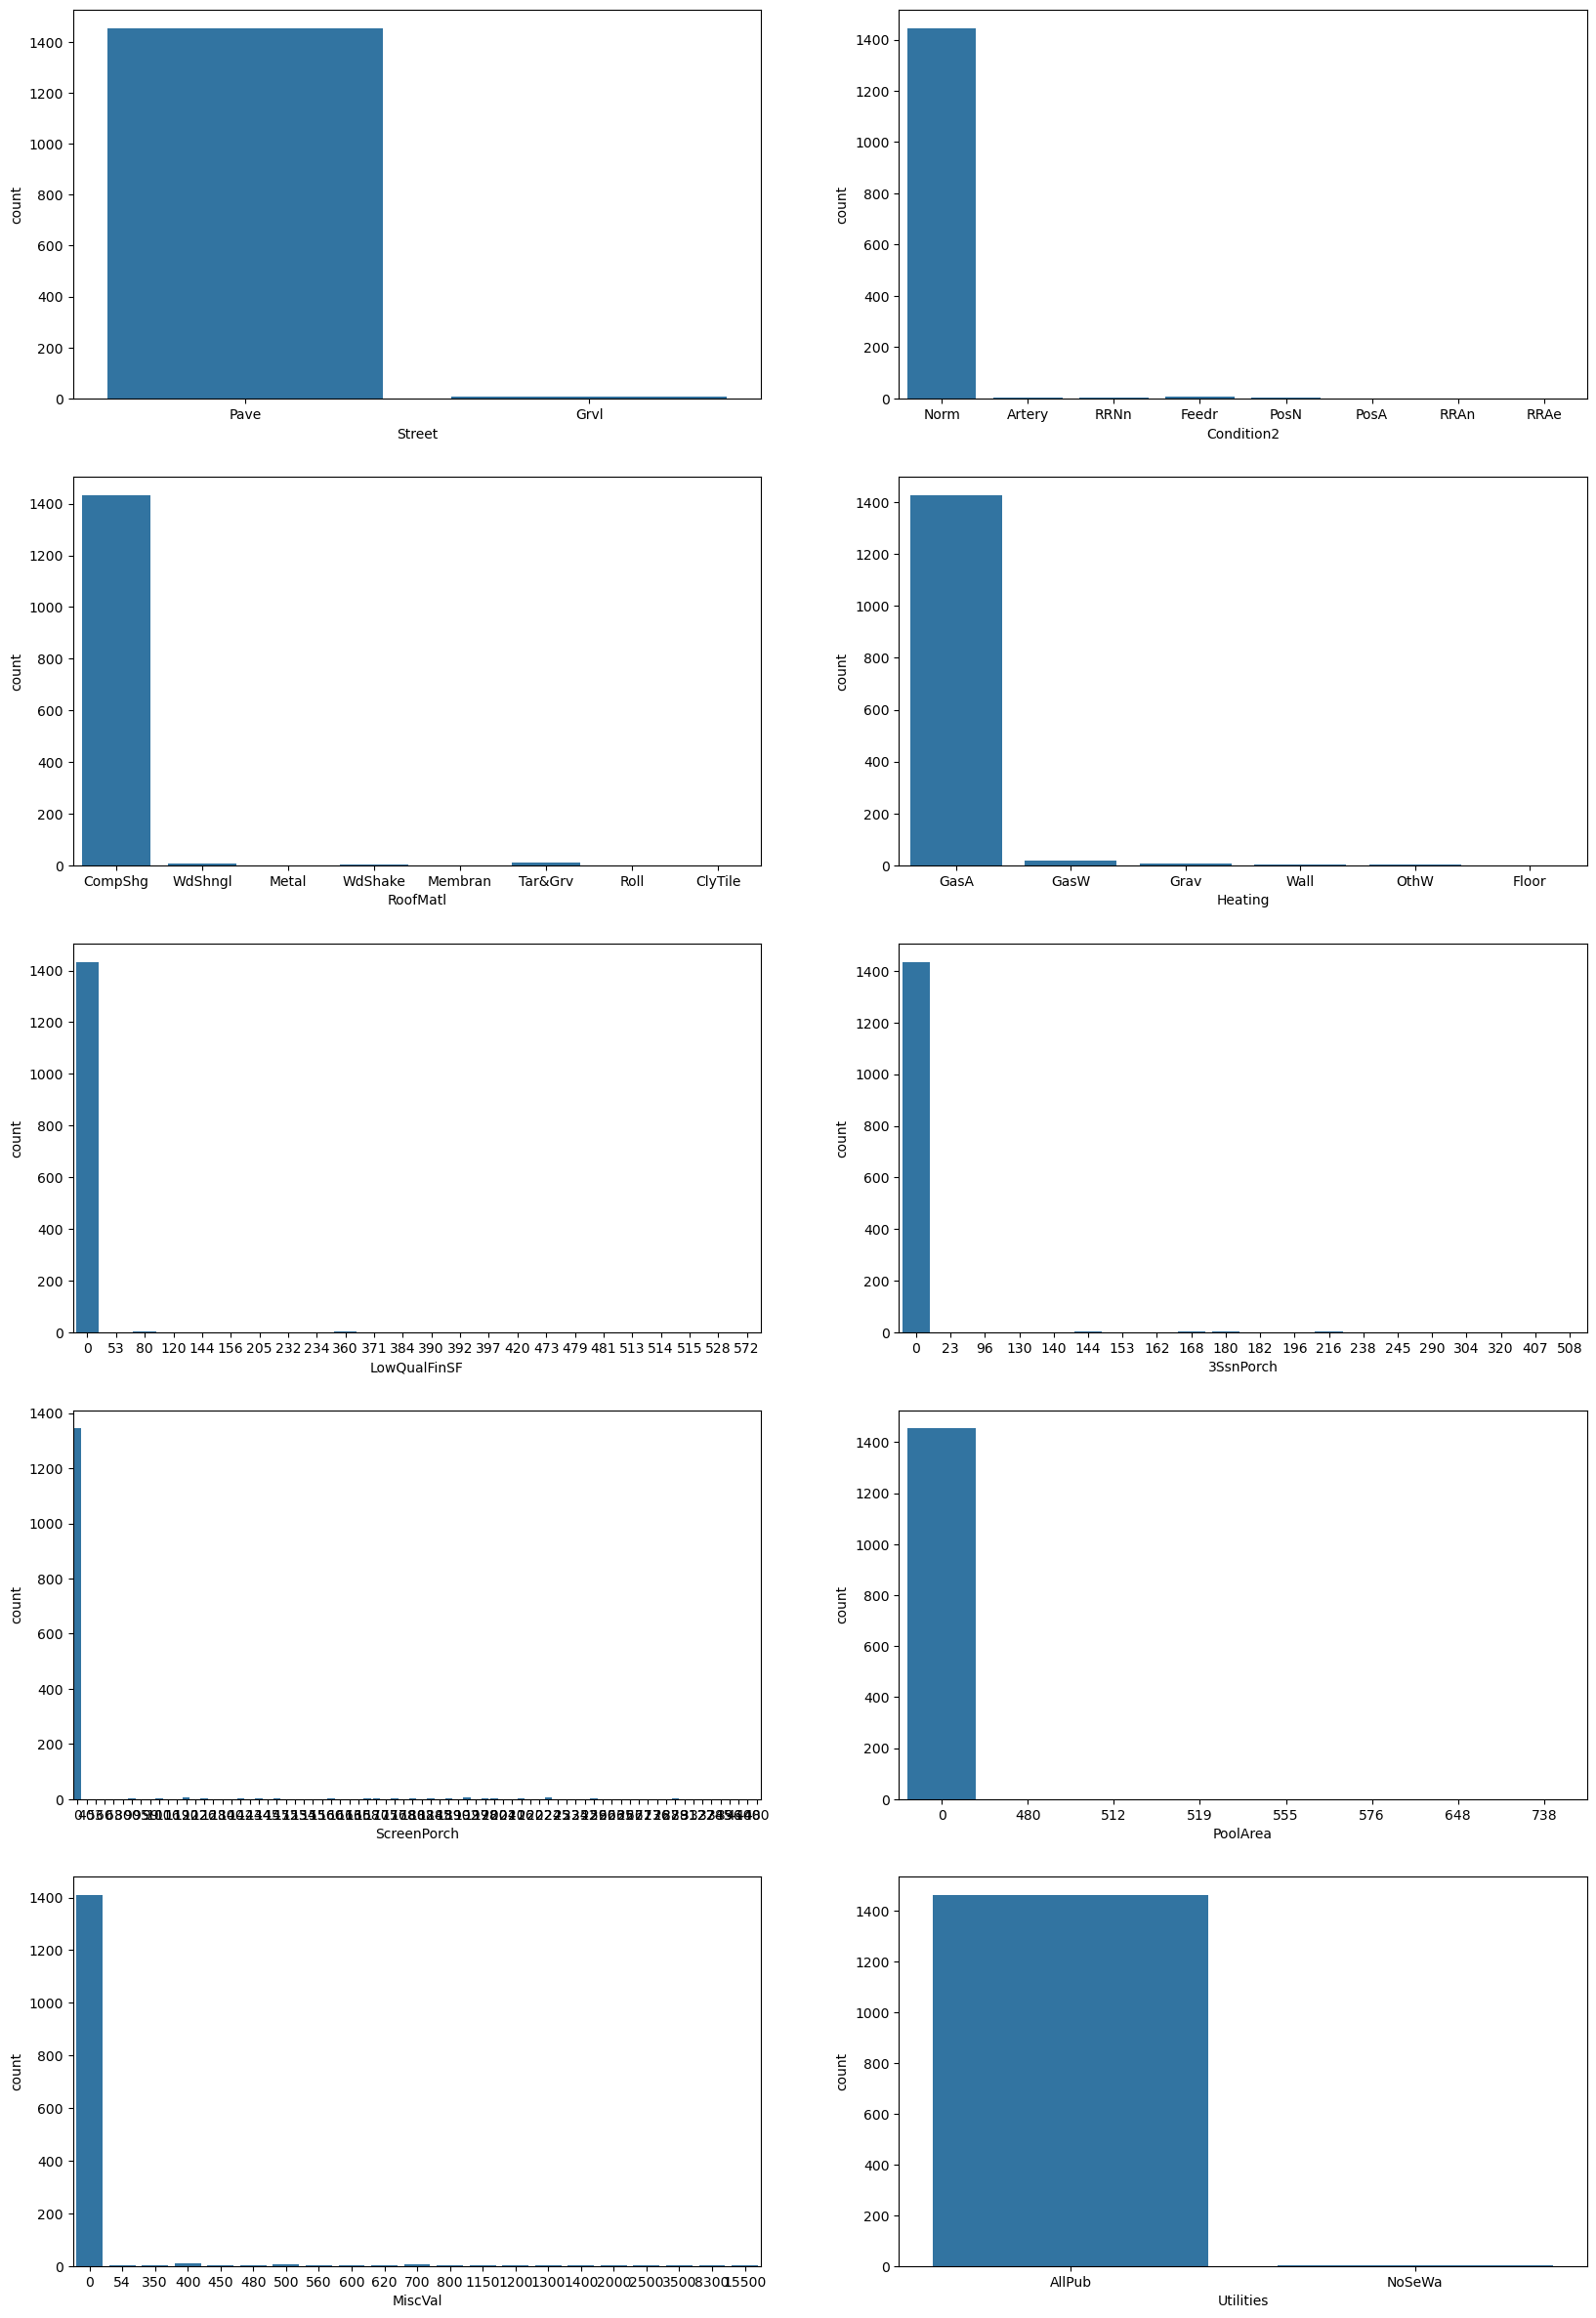

In [60]:
%matplotlib inline
plt.rcParams['figure.figsize']=20,30
#unimportant columns
unin_col=['Street','Condition2','RoofMatl','Heating','LowQualFinSF','3SsnPorch','ScreenPorch','PoolArea','MiscVal','Utilities']
for i,var in enumerate(unin_col,start=1):
    plt.subplot(5,2,i)
    sns.countplot(x=var,data=df)
    df.drop(columns=var,inplace=True)

In [61]:
df.drop(columns='Id',inplace=True)

In [62]:
df.shape

(1460, 63)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   LandSlope      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   int64  
 12  OverallCond    1460 non-null   int64  
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  RoofStyle      1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  MasVnrAr

In [64]:
# Getting categorical variables
cat_var = df.select_dtypes(include='object').columns
cat_var

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [65]:
# Getting numerical variables
num_var = df.select_dtypes(exclude='object').columns
num_var

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold',
       'SalePrice'],
      dtype='object')

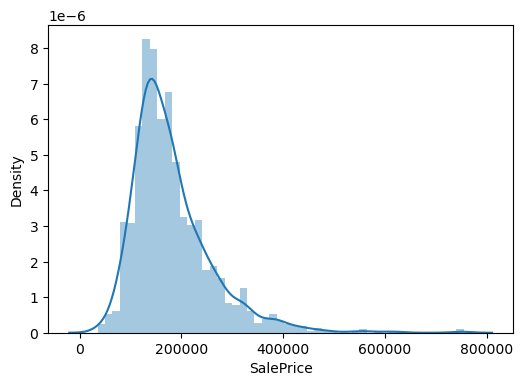

In [66]:
%matplotlib inline
plt.rcParams['figure.figsize']=6,4
sns.distplot(df['SalePrice'])
plt.show()

- The distribution is skewed to the right, as can be seen by looking at it (i.e., outliers on data with high Sales Price). This suggests that there are anomalies present.

In [68]:
df['SalePrice'].skew()

1.8828757597682129

The general guideline for determining skewness:
1) In the range of -0.5 to 0.5, the skewness indicates a reasonably symmetric set of data.
2) The data are substantially skewed if the skewness falls between -1 and –0.5 or between 0.5 and 1.
3) The data are significantly skewed if the skewness is greater than 1 or less than -1.


In [70]:
df['SalePrice'].kurtosis()

6.536281860064529

- Kurtosis calculates the distribution's tail-heaviness.
- Kurtosis value for a normal distribution is 3.
- The tail is heavier when the kurtosis value rises, and vice versa.



In our case as the kurtosis value is more than ~6.5, distribution tail is heavier

Handling SalePrice high skewness and kurtosis
- To handle this, we will perform Log Transformation on "SalePrice" column. This will transform the variable and make it as normally distributed as possible. Basically it reduces the skewness in the data

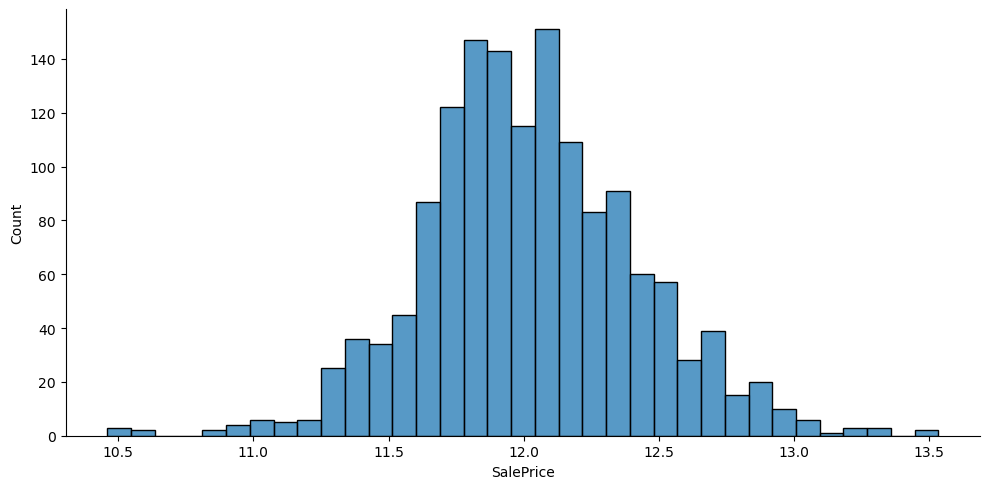

In [73]:
%matplotlib inline
plt.rcParams['figure.figsize']=6,4
sns.displot(np.log(df['SalePrice']), aspect=2)
plt.show()

- The data now roughly conforms to a normal distribution.

In [75]:
df['Transformed_SalePrice'] = np.log(df['SalePrice'])

In [76]:
df.shape

(1460, 64)

## EDA- Exploratory Data Analysis

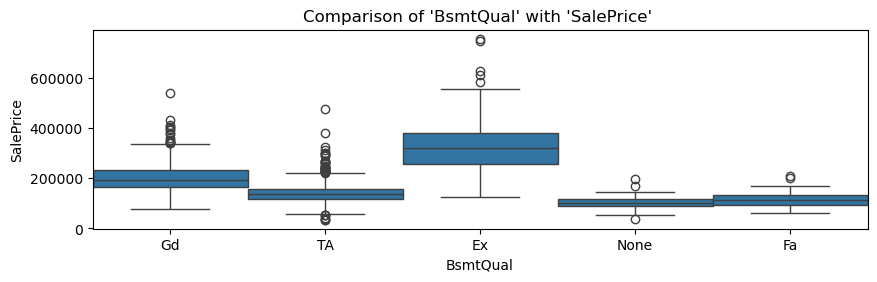

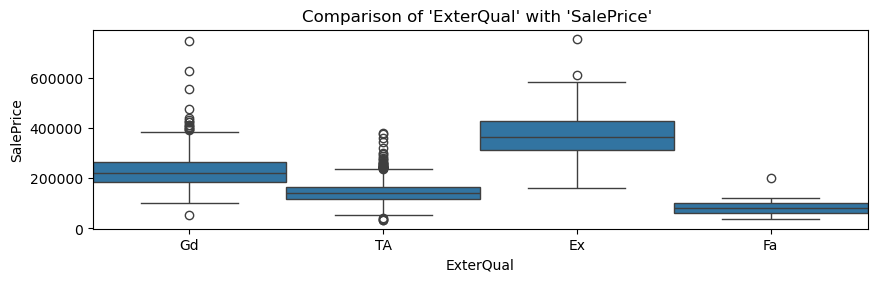

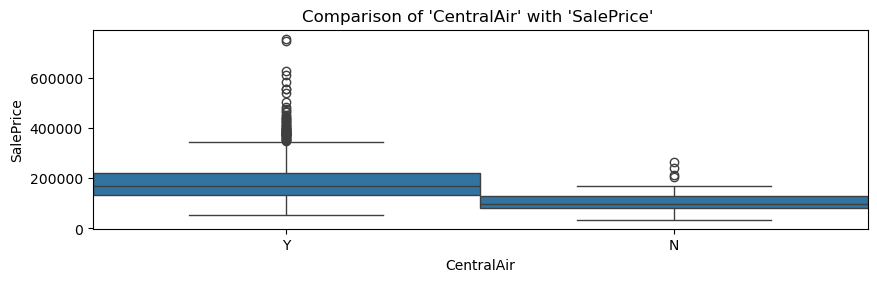

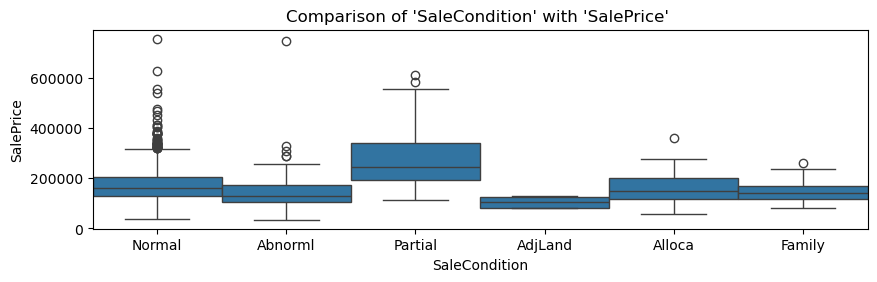

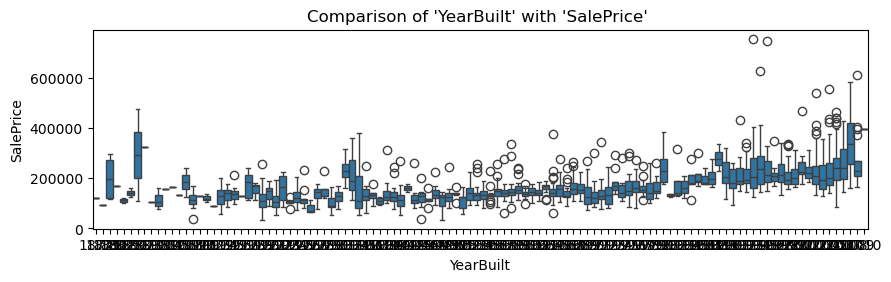

In [78]:
%matplotlib inline
plt.rcParams['figure.figsize']=10,15
a2=['BsmtQual','ExterQual','CentralAir','SaleCondition','YearBuilt']
for i,var in enumerate(a2,start=1):
    plt.subplot(5,1,i)
    sns.boxplot(x=var, y='SalePrice', data=df, width=1)
    plt.title(f"Comparison of '{var}' with 'SalePrice' ")
    plt.show()

- As Basement quality increases from Fair to Excellent, we see a corresponding increase in SalePrice
- As Exterior quality increases from Fair to Excellent, we see a corresponding increase in SalePrice
- Houses with Central Air conditioning have a higher median price compared to the houses that don't have Central Air conditioning
- Houses that are partially completed have a higher median Saleprice compared to other categories. This might be because partially completed houses are usually new houses under construction.
- As the house age increases, we can see that the median SalePrice drops but there are few cases where the SalePrice goes up as well

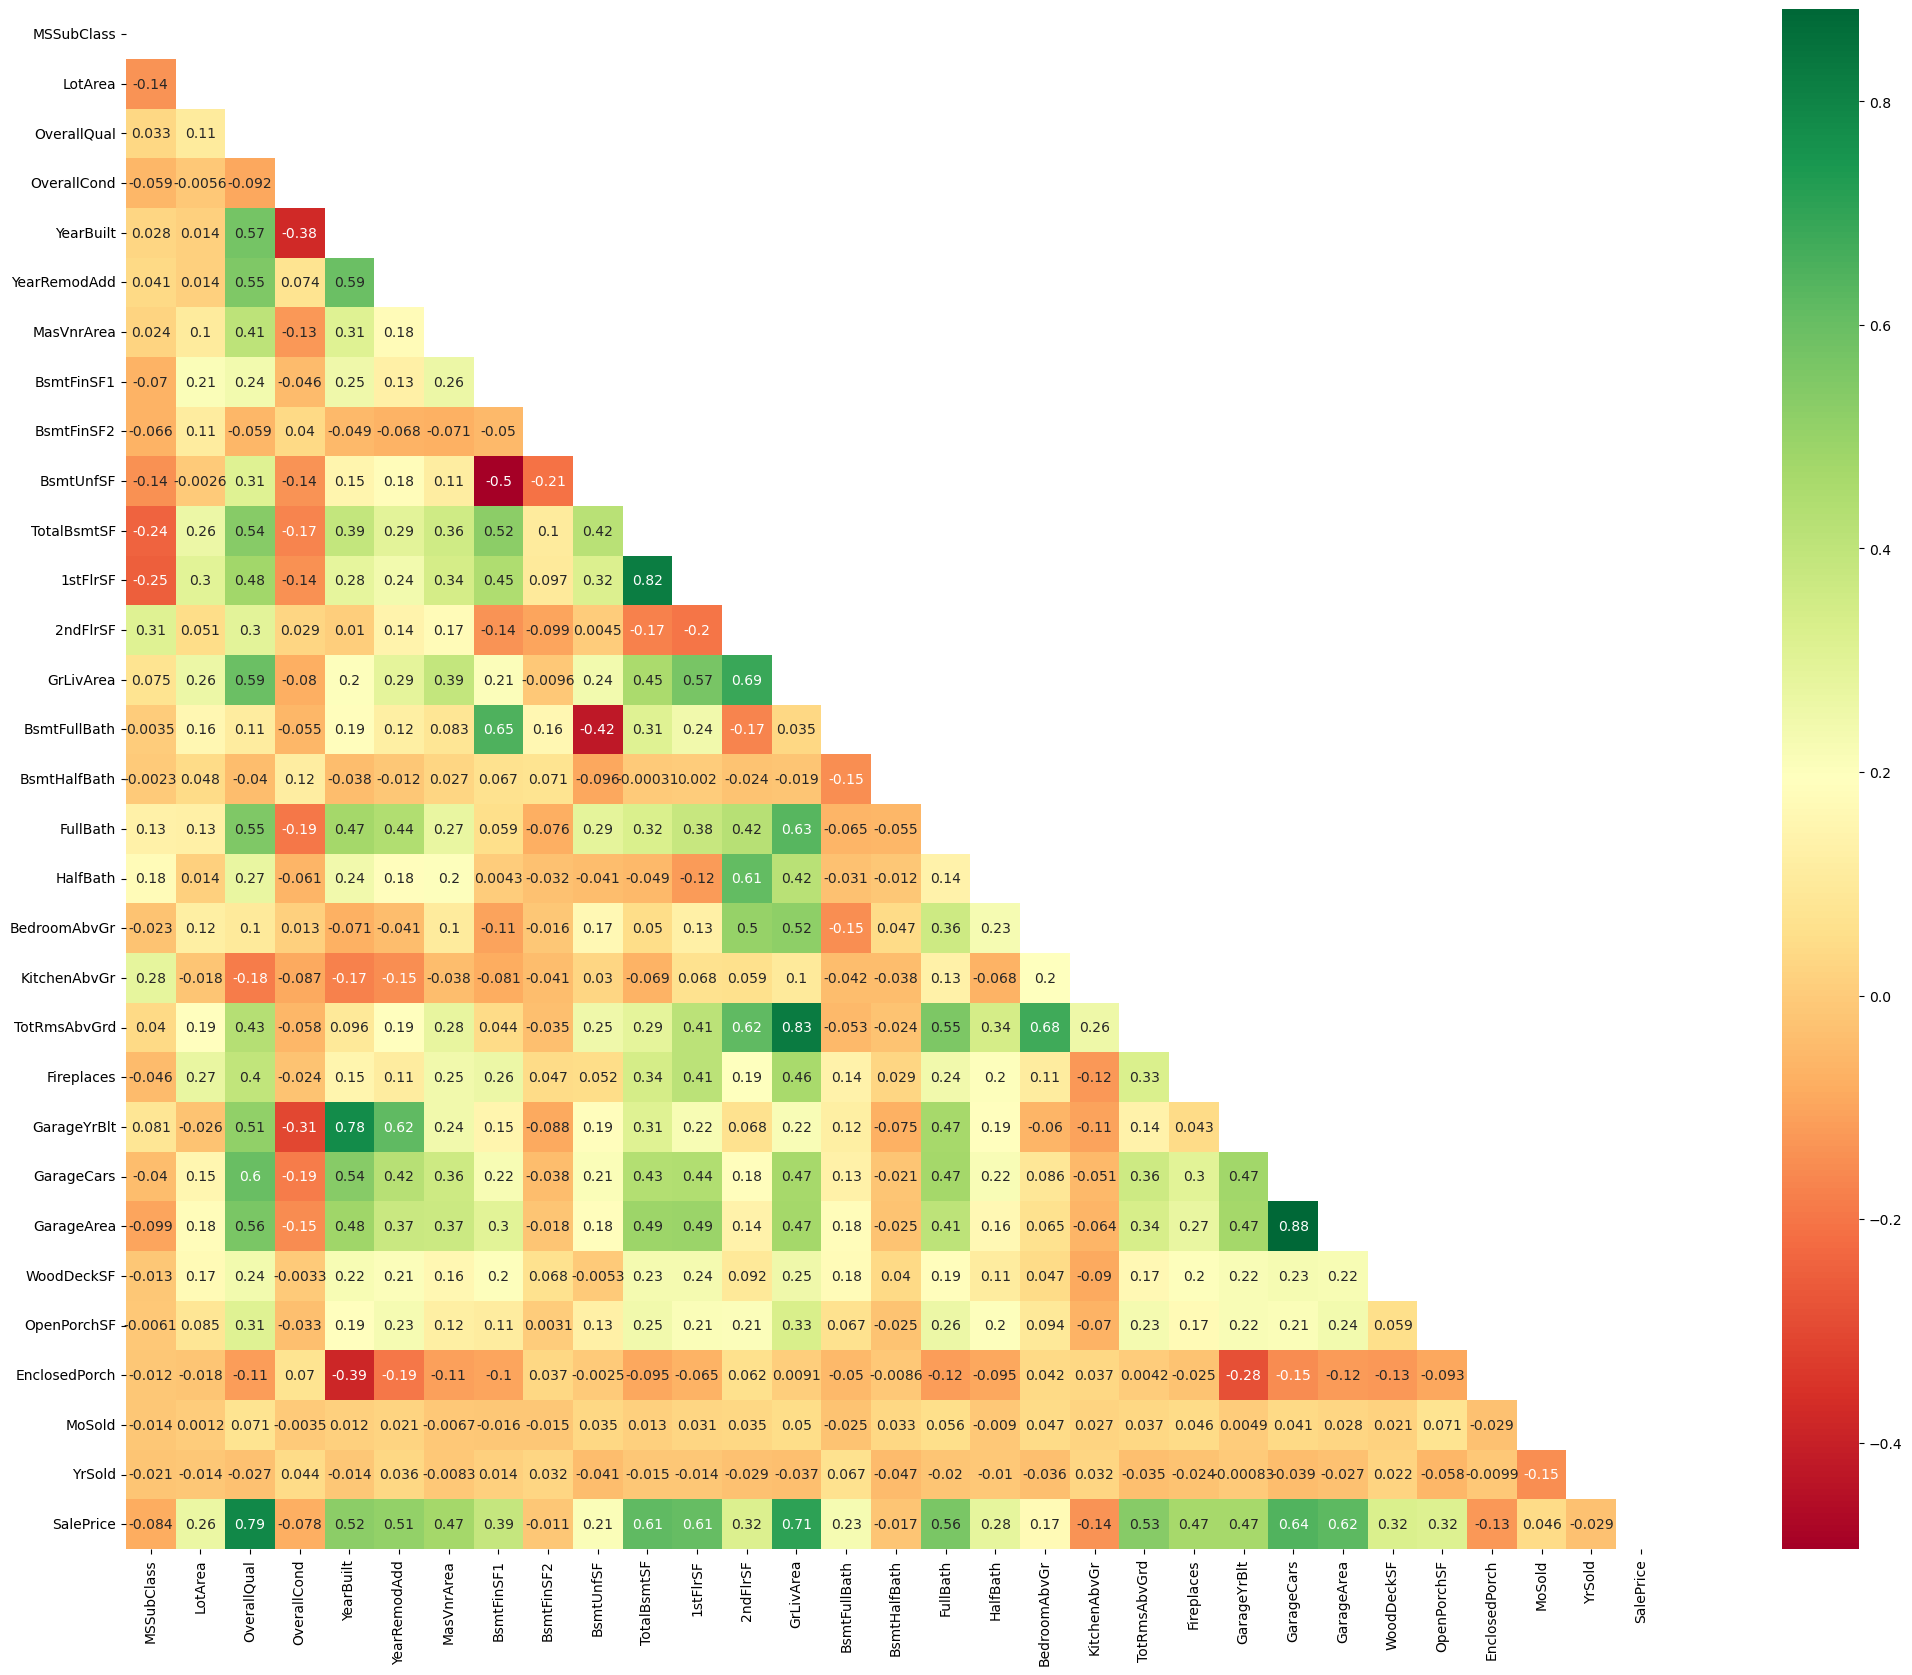

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df is your DataFrame

# Drop the 'Transformed_SalePrice' column and select only numeric columns
numeric_df = df.drop(columns='Transformed_SalePrice', axis=1).select_dtypes(exclude='object')

corr = numeric_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=[30, 20])

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='RdYlGn', annot=True, square=True, mask=mask)

plt.show()


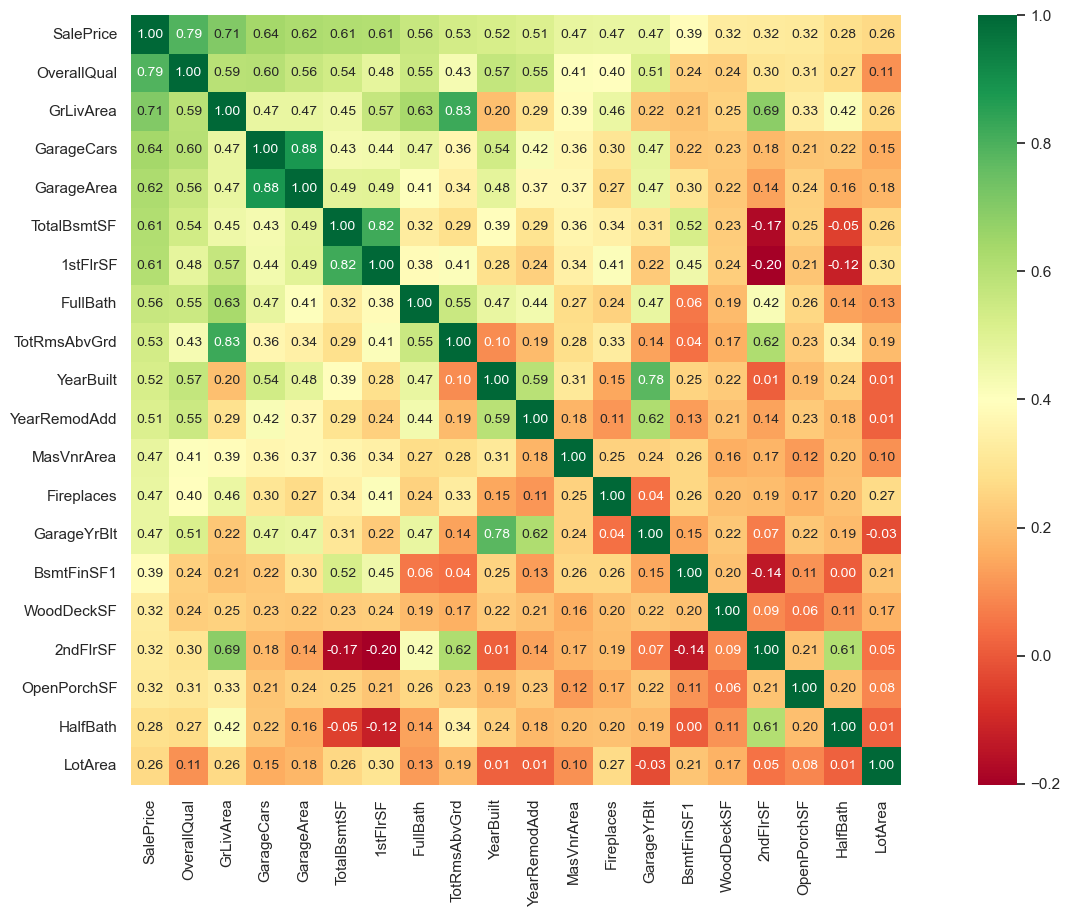

In [81]:
plt.figure(figsize=[20,10])

k = 20 # number of variables for a heatmap
cols = corr.nlargest(k,'SalePrice')['SalePrice'].index
corrmatrix = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(corrmatrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},yticklabels=cols.values, xticklabels=cols.values, cmap='RdYlGn')
plt.show()

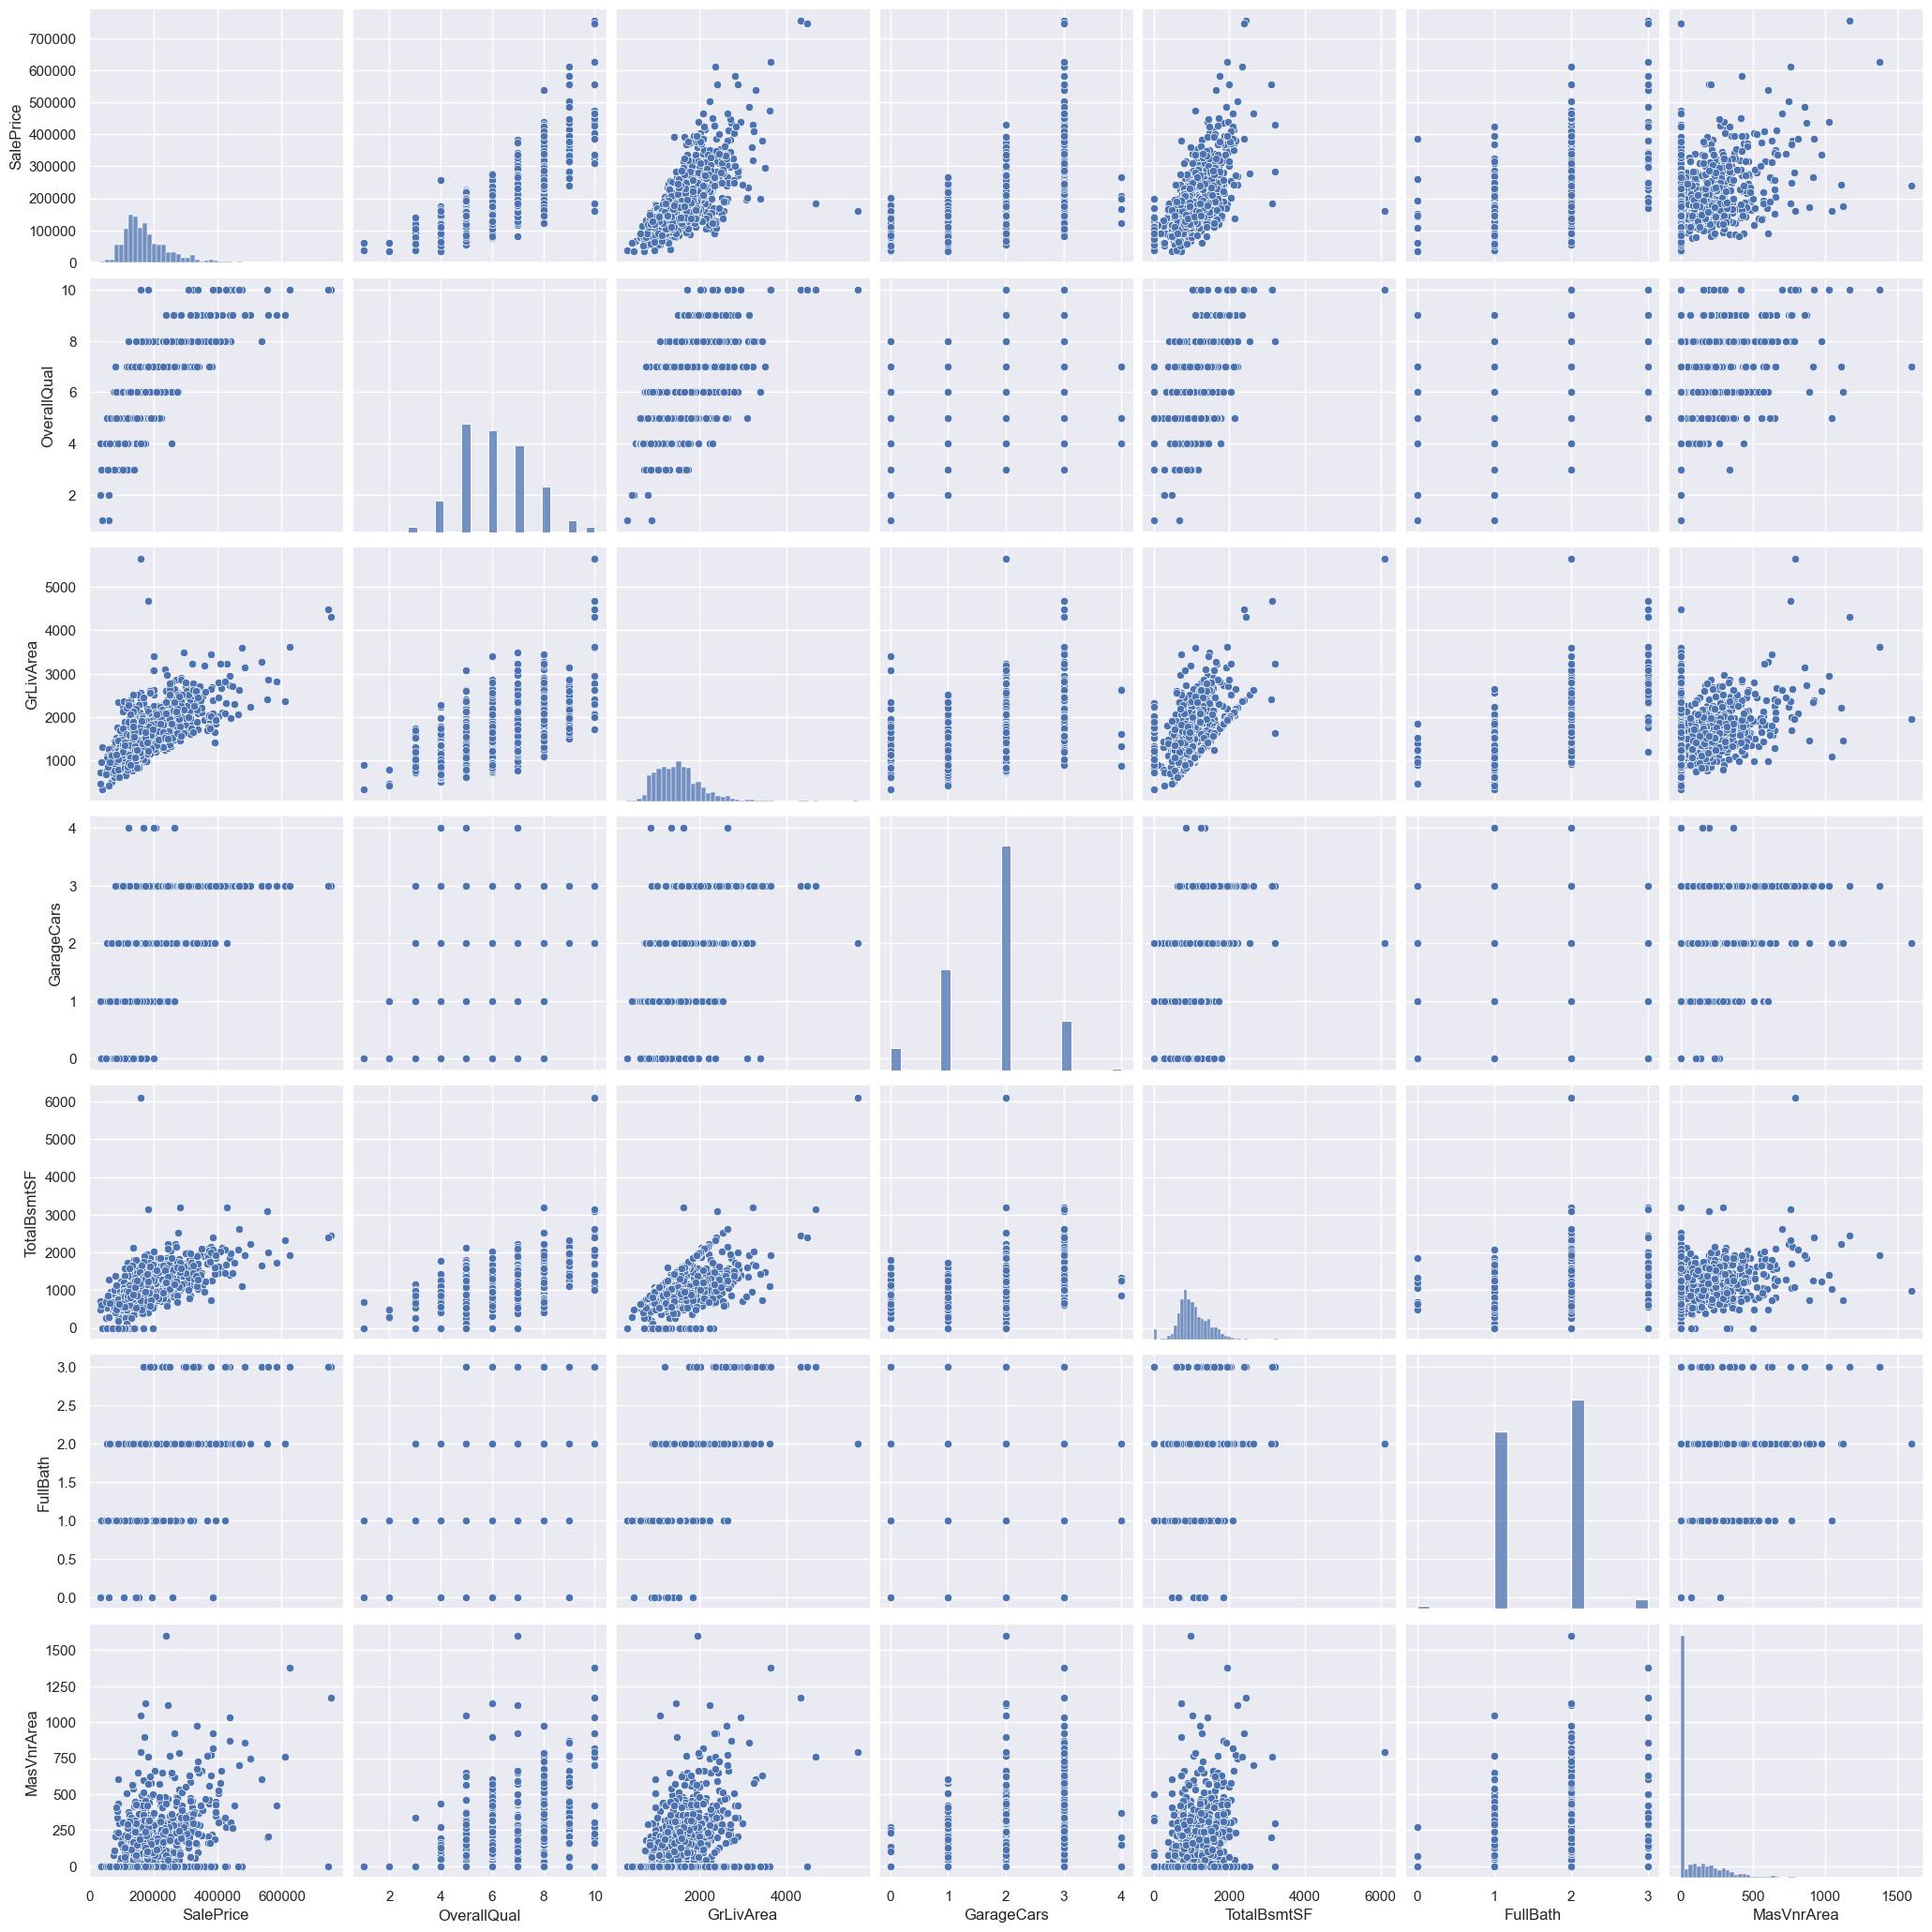

In [82]:
columns = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','MasVnrArea']
sns.pairplot(df[columns], size=3)
plt.show()

In [83]:
df.shape

(1460, 64)

In [84]:
from sklearn.preprocessing import LabelEncoder
df_categorical=df.select_dtypes(include='object').columns
lc=LabelEncoder()
for i in df_categorical:
    df[i]=lc.fit_transform(df[i])

In [85]:
df[df_categorical].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,3,3,4,0,5,2,0,5,1,12,13,2,4,2,2,4,3,2,6,0,1,4,2,6,1,2,5,5,2,8,4
1,3,3,3,2,0,24,1,0,2,1,8,8,3,4,1,2,4,1,0,6,0,1,4,3,6,1,2,5,5,2,8,4
2,3,0,3,4,0,5,2,0,5,1,12,13,2,4,2,2,4,2,2,6,0,1,4,2,6,1,2,5,5,2,8,4
3,3,0,3,0,0,6,2,0,5,1,13,15,3,4,0,4,1,3,0,6,2,1,4,2,6,5,3,5,5,2,8,0
4,3,0,3,2,0,15,2,0,5,1,12,13,2,4,2,2,4,0,2,6,0,1,4,2,6,1,2,5,5,2,8,4


In [86]:
df.dtypes

MSSubClass                 int64
MSZoning                   int32
LotArea                    int64
LotShape                   int32
LandContour                int32
LotConfig                  int32
LandSlope                  int32
Neighborhood               int32
Condition1                 int32
BldgType                   int32
HouseStyle                 int32
OverallQual                int64
OverallCond                int64
YearBuilt                  int64
YearRemodAdd               int64
RoofStyle                  int32
Exterior1st                int32
Exterior2nd                int32
MasVnrArea               float64
ExterQual                  int32
ExterCond                  int32
Foundation                 int32
BsmtQual                   int32
BsmtCond                   int32
BsmtExposure               int32
BsmtFinType1               int32
BsmtFinSF1                 int64
BsmtFinType2               int32
BsmtFinSF2                 int64
BsmtUnfSF                  int64
TotalBsmtS

In [87]:
df.shape

(1460, 64)

In [88]:
#Divide data into X and y for building the model
x=df.drop(['SalePrice','Transformed_SalePrice'], axis=1)
y=df['Transformed_SalePrice']

In [89]:
x.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition
0,60,3,8450,3,3,4,0,5,2,0,5,7,5,2003,2003,1,12,13,196.0,2,4,2,2,4,3,2,706,6,0,150,856,0,1,4,856,854,1710,1,0,2,1,3,1,2,8,6,0,1,2003.0,2,2,548,5,5,2,0,61,0,2,2008,8,4
1,20,3,9600,3,3,2,0,24,1,0,2,6,8,1976,1976,1,8,8,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,0,1,4,1262,0,1262,0,1,2,0,3,1,3,6,6,1,1,1976.0,2,2,460,5,5,2,298,0,0,5,2007,8,4
2,60,3,11250,0,3,4,0,5,2,0,5,7,5,2001,2002,1,12,13,162.0,2,4,2,2,4,2,2,486,6,0,434,920,0,1,4,920,866,1786,1,0,2,1,3,1,2,6,6,1,1,2001.0,2,2,608,5,5,2,0,42,0,9,2008,8,4
3,70,3,9550,0,3,0,0,6,2,0,5,7,5,1915,1970,1,13,15,0.0,3,4,0,4,1,3,0,216,6,0,540,756,2,1,4,961,756,1717,1,0,1,0,3,1,2,7,6,1,5,1998.0,3,3,642,5,5,2,0,35,272,2,2006,8,0
4,60,3,14260,0,3,2,0,15,2,0,5,8,5,2000,2000,1,12,13,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,0,1,4,1145,1053,2198,1,0,2,1,4,1,2,9,6,1,1,2000.0,2,3,836,5,5,2,192,84,0,12,2008,8,4


In [90]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: Transformed_SalePrice, dtype: float64

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [92]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# Building base Model

In [105]:
from sklearn.linear_model import (
LinearRegression,Ridge,Lasso,ElasticNet,SGDRegressor,HuberRegressor
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [121]:
#Define the models
models={
    'Linear Regression':LinearRegression(),
    'Robust Regression':HuberRegressor(),
    'Ridge Regression':Ridge(),
    'ElasticNet Regressor': ElasticNet(),
    'Lasso Regression':Lasso(),
    'Polynomial Regression':Pipeline([
        ('poly',PolynomialFeatures(degree=2)),
        ('linear',LinearRegression())
    ]),
    'SGD Regressor':SGDRegressor(),
    'ANN':MLPRegressor(hidden_layer_sizes=(100,),max_iter=1000),
    'Random Forest Regressor':RandomForestRegressor(),
    'Support vector Regressor':SVR(),
    'LGBM':lgb.LGBMRegressor(),
    'XGBoost':xgb.XGBRFRegressor(),
    'KNN Regressor':KNeighborsRegressor(),
    'Decision Tree Regressor':DecisionTreeRegressor()
}
results=[]

In [123]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_pred_train=model.predict(x_train)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test=r2_score(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test=mean_squared_error(y_test, y_pred)
    mae_train=mean_absolute_error(y_train, y_pred_train)
    mae_test=mean_absolute_error(y_test, y_pred)
    results.append({
        'Name of the model':name,
        'r2_train':r2_train,
        'r2_test':r2_test,
        'mse_train':mse_train,
        'mse_test':mse_test,
        'mae_train':mae_train,
        'mae_test':mae_test
    })
df1=pd.DataFrame(results)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2912
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 62
[LightGBM] [Info] Start training from score 12.022368


In [124]:
df1

,Name of the model,r2_train,r2_test,mse_train,mse_test,mae_train,mae_test
0,Linear Regression,0.898227,-1.153681e+22,1.644248e-02,1.782565e+21,8.624916e-02,3.276174e+10
1,Robust Regression,0.891084,8.088075e-01,1.759663e-02,2.954137e-02,8.265981e-02,8.952292e-02
2,Ridge Regression,0.898221,8.255036e-01,1.644352e-02,2.696163e-02,8.620565e-02,9.514410e-02
3,ElasticNet Regressor,0.000000,-2.035890e-04,1.615608e-01,1.545426e-01,3.099155e-01,3.093389e-01
4,Lasso Regression,0.000000,-2.035890e-04,1.615608e-01,1.545426e-01,3.099155e-01,3.093389e-01
5,Polynomial Regression,1.000000,2.177292e-01,4.415151e-30,1.208695e-01,1.484353e-15,2.123653e-01
6,SGD Regressor,0.892870,8.257916e-01,1.730795e-02,2.691714e-02,8.783078e-02,9.723896e-02
7,ANN,0.935134,-5.103178e+00,1.047976e-02,9.430089e-01,7.462677e-02,7.112674e-01
8,Random Forest Regressor,0.980698,8.914713e-01,3.118447e-03,1.676889e-02,3.696991e-02,8.968122e-02
9,Support vector Regressor,0.965355,8.649313e-01,5.597333e-03,2.086961e-02,6.369205e-02,9.885361e-02


To determine which model is the best based on the provided metrics, we should consider the following criteria for regression models:

1. **R-squared (`r2`)**: This indicates how well the model's predictions match the actual data. Values closer to 1 are better.
2. **Mean Squared Error (`mse`)**: This measures the average of the squares of the errors. Lower values are better.
3. **Mean Absolute Error (`mae`)**: This measures the average magnitude of errors in a set of predictions, without considering their direction. Lower values are better.

### Analyzing the Models

From the table, here’s a summary of each model's performance:

1. **Linear Regression**
   - `r2_test`: \(-1.153681e+22\) (negative, indicating poor fit)
   - `mse_test`: \(1.782565e+21\)
   - `mae_test`: \(3.276174e+10\)

2. **Robust Regression**
   - `r2_test`: \(8.088075e-02\)
   - `mse_test`: \(2.954137e-02\)
   - `mae_test`: \(8.952299e-02\)

3. **Ridge Regression**
   - `r2_test`: \(2.255306e-01\)
   - `mse_test`: \(1.644353e-02\)
   - `mae_test`: \(5.914422e-02\)

4. **ElasticNet Regressor** and **Lasso Regressor**
   - `r2_test`: \(-2.035980e-04\)
   - `mse_test`: \(1.545426e-01\)
   - `mae_test`: \(3.099155e-01\)

5. **Polynomial Regression**
   - `r2_test`: \(2.177922e-01\)
   - `mse_test`: \(1.208695e-01\)
   - `mae_test`: \(2.125369e-01\)

6. **SGD Regressor**
   - `r2_test`: \(2.879744e-01\)
   - `mse_test`: \(1.187494e-01\)
   - `mae_test`: \(2.105359e-01\)

7. **ANN**
   - `r2_test`: \(1.374570e-01\)
   - `mse_test`: \(2.079377e-01\)
   - `mae_test`: \(2.246707e-01\)

8. **Random Forest Regressor**
   - `r2_test`: \(8.914713e-01\)
   - `mse_test`: \(1.678889e-02\)
   - `mae_test`: \(8.968122e-02\)

9. **Support Vector Regressor**
   - `r2_test`: \(8.649313e-01\)
   - `mse_test`: \(2.089691e-02\)
   - `mae_test`: \(9.885361e-02\)

10. **LGBM**
    - `r2_test`: \(9.108212e-01\)
    - `mse_test`: \(1.682092e-02\)
    - `mae_test`: \(8.939059e-02\)

11. **XGBoost**
    - `r2_test`: \(5.544590e-01\)
    - `mse_test`: \(9.580549e-02\)
    - `mae_test`: \(2.237171e-01\)

12. **KNN Regressor**
    - `r2_test`: \(7.938346e-01\)
    - `mse_test`: \(3.185458e-02\)
    - `mae_test`: \(1.287746e-01\)

13. **Decision Tree Regressor**
    - `r2_test`: \(7.527046e-01\)
    - `mse_test`: \(3.820998e-02\)
    - `mae_test`: \(1.435743e-01\)

## Best Model

Based on the metrics, **LGBM (LightGBM)** is likely the best model. It has a high `r2_test` value of 0.910821, indicating a good fit to the test data, and low `mse_test` and `mae_test` values, suggesting accurate predictions. The Random Forest Regressor also performs similarly well, with an `r2_test` of 0.891471, but slightly worse `mse_test` and `mae_test` compared to LGBM. 

Consider using LGBM for its overall balance of performance on this dataset. If model interpretability is crucial, you might also look into other models that offer more transparency, like the Random Forest Regressor.

To determine which model is the best, we should consider the balance between training and testing performance, the complexity of the model, and the overall error metrics. Here are the considerations for each model:

### Key Metrics for Evaluation:
- **R² Score**: Indicates the proportion of variance explained by the model. Higher is generally better, but it should be similar for both training and test sets to avoid overfitting.
- **MSE (Mean Squared Error)**: Measures the average squared difference between predicted and actual values. Lower is better.
- **MAE (Mean Absolute Error)**: Measures the average absolute difference between predicted and actual values. Lower is better.

### Model Performance Summary:

1. **Linear Regression**:
   - **R² Train**: 0.898227
   - **R² Test**: -1.153681e+22 (significantly negative)
   - **MSE Train**: 0.016442
   - **MSE Test**: 1.782565e+21
   - **MAE Train**: 0.086249
   - **MAE Test**: 3.276174e+10
   - **Conclusion**: Severe overfitting, poor generalization. Not a good model.

2. **KNeighbor Regressor**:
   - **R² Train**: 0.869135
   - **R² Test**: 0.793835
   - **MSE Train**: 0.021143
   - **MSE Test**: 0.031849
   - **MAE Train**: 0.101664
   - **MAE Test**: 0.128370
   - **Conclusion**: Balanced performance, good generalization. A good model.

3. **Support Vector Regressor**:
   - **R² Train**: 0.965355
   - **R² Test**: 0.864931
   - **MSE Train**: 0.005597
   - **MSE Test**: 0.020870
   - **MAE Train**: 0.063692
   - **MAE Test**: 0.098854
   - **Conclusion**: Slight overfitting, but overall good performance. A good model.

4. **Random Forest Regressor**:
   - **R² Train**: 0.980918
   - **R² Test**: 0.889454
   - **MSE Train**: 0.003083
   - **MSE Test**: 0.017081
   - **MAE Train**: 0.036678
   - **MAE Test**: 0.089254
   - **Conclusion**: Slight overfitting, but excellent performance. A good model.

5. **Decision Tree Regressor**:
   - **R² Train**: 1.000000
   - **R² Test**: 0.750913
   - **MSE Train**: 0.000000
   - **MSE Test**: 0.038487
   - **MAE Train**: 0.000000
   - **MAE Test**: 0.141652
   - **Conclusion**: Severe overfitting, poor generalization. Not a good model.

### Best Model Selection:
- **Random Forest Regressor**: It shows the highest R² on the test set, indicating the best generalization performance. Although there is slight overfitting, it is within acceptable limits, and the overall error metrics are low.
- **Support Vector Regressor**: Also a good option with balanced performance, though slightly lower than the Random Forest.

### Conclusion:
**The Random Forest Regressor is the best model** based on the balance between training and test performance, as well as low error metrics. It shows excellent generalization and maintains low errors, making it a robust choice for your problem.

In [113]:
x.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [115]:
# to build the front end i need to identify the key attributes.
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(x_train, y_train)
importances = model.feature_importances_
features = x.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [116]:
feature_importance_df

,Feature,Importance
11,OverallQual,0.519212
36,GrLivArea,0.111832
30,TotalBsmtSF,0.044511
51,GarageArea,0.044383
50,GarageCars,0.033202
34,1stFlrSF,0.027031
32,CentralAir,0.022800
26,BsmtFinSF1,0.019232
13,YearBuilt,0.016007
1,MSZoning,0.013296


In [119]:
feature_importance_df.to_csv('feature importance.csv',index=False)